<a href="https://colab.research.google.com/github/mungaimoureen/Housing-Prices-Predictions-week-7/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2022_06_Moureen_Mungai_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices predicton.



## Overview
**i. Understanding the context**  
Studying the factors that affect housing prices using given information on real estate properties that was collected over the past few months. Additionally, create a model that would allow the company to accurately predict the sale prices of the houses upon being provided with the predictor variables. 

**ii. Specifying the objectives**  
The specific objectives of this project are:  
> 1. To establish the relationship between the different housing aspects and sale prices.
2. To create a model that will accurately  predict the prices of the houses upon being provided with the predictor variables.

**iii. Defining the metric for success**  
The project will be considered successful when at least one model has a RMSE that is less than 10% of the mean of the housing prices   

**iv. Data relevance**  
The appropriate dataset for this project is one that contains data on aspects of different houses including their prices. The dataset for this study is retrieved from http://bit.ly/IndependentProjectWeek7Dataset

**v. Project design**  
In order to work on the above problem, we need to do the following:

a. Acquire the datasets with appropriate data for our project  
b. Perform data cleaning by dropping irrelevant data, finding and dealing with duplicates, missing data, and anomalies   
c. Perform descriptive analysis to gain insights on the given data
d. Create linear regression, quantile regression, lasso regression, ridge regression and elastic net regression models that will work towards accomplishing our objective  
e. Give conclusions and recommendations on the different models

## Importing libraries

In [ ]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [ ]:
# disable future warnings by running this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [ ]:
# set all float results to have only two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Loading the dataset

In [ ]:
# load csv file with housing data from the given url
hass = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

## Reading the dataset

In [ ]:
# preview the top 5 entries of the dataset
hass.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [ ]:
# check the general information about our dataset
# the information includes the number of entries and columns, name and data type of each column, number of non-null values in every column, and the distribution of each data type
hass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## Data cleaning

In [ ]:
# check for duplicates in the dataset
print('Number of duplicates before cleaning: '+str(hass.duplicated().sum()))

# drop duplicates
hass = hass.drop_duplicates()

# confirm that the duplicates have been dropped
print('Number of duplicates after cleaning: ' +str(hass.duplicated().sum()))

Number of duplicates before cleaning: 3
Number of duplicates after cleaning: 0


In [ ]:
# drop irrelevant columns
hass.drop(['id', 'long', 'lat' ], axis=1, inplace=True)
# we have dropped longitude and latitude columns since zipcode column  basically contains location data

In [ ]:
#check for missing values
hass.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# create a new column 'last_modified' that tells when the house was last modified then drop 'yr_built' and 'yr_renovated' columns

# create a function that defines the status of the match
def year (x):
   if x['yr_renovated'] != 0:
      return x['yr_renovated']
   return x['yr_built']

# add a new column and apply the function
hass['last_modified'] = (hass.apply (lambda x: year(x), axis=1)).astype(int)

# drop 'yr_built' and 'yr_renovated'
hass.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

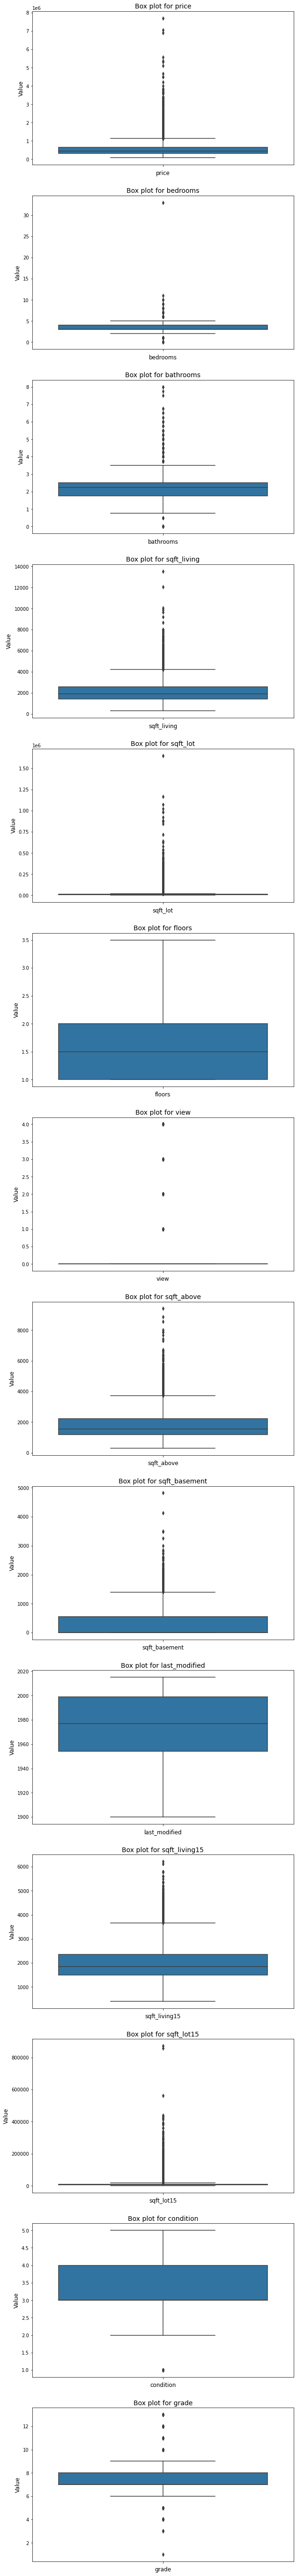

In [ ]:
# check for outliers in the variables
col_names= ['price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors', 'view', 'sqft_above', 'sqft_basement', 'last_modified', 'sqft_living15',	'sqft_lot15', 'condition', 'grade']

fig, ax = plt.subplots(len(col_names), figsize=(10,100))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=hass[col_val], ax=ax[i])
    ax[i].set_title('Box plot for {}'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Value', fontsize=12)

Our medels will be using regression that is robust to outliers hence will not be removed.

In [ ]:
# check the number of records remaining after cleaning
hass.shape

(21610, 16)

## Data analysis

### Univariate analysis

In [ ]:
# compute the general statistical summaries of the numerical variables
hass.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,last_modified
count,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00,21610.00
mean,540178.94,3.37,2.11,2079.88,15108.29,1.49,0.01,0.23,3.41,7.66,1788.35,291.53,98077.95,1986.52,12769.03,1973.38
std,367387.59,0.93,0.77,918.50,41423.23,0.54,0.09,0.77,0.65,1.18,828.14,442.60,53.51,685.43,27305.97,28.81
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,98001.00,399.00,651.00,1900.00
25%,321612.50,3.00,1.75,1425.50,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,98033.00,1490.00,5100.00,1954.00
50%,450000.00,3.00,2.25,1910.00,7619.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,98065.00,1840.00,7620.00,1977.00
75%,645000.00,4.00,2.50,2550.00,10688.75,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,98118.00,2360.00,10083.00,1999.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,98199.00,6210.00,871200.00,2015.00


In [ ]:
# compute the skewness of the quantitative variables
numeric_feats = ['price','bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
skewed_feats = hass[numeric_feats].skew()

skewed_feats.sort_values(ascending=False)


sqft_lot        13.06
sqft_lot15       9.51
price            4.02
view             3.40
bedrooms         1.97
sqft_basement    1.58
sqft_living      1.47
sqft_above       1.45
sqft_living15    1.11
floors           0.62
bathrooms        0.51
dtype: float64

Only 'floors' and 'bathrooms' are moderately skewed while the rest of the variables are highly skewed.

### Bivariate Analysis  
In bivariate analysis, we will investigate the relationship between the different variables and house prices

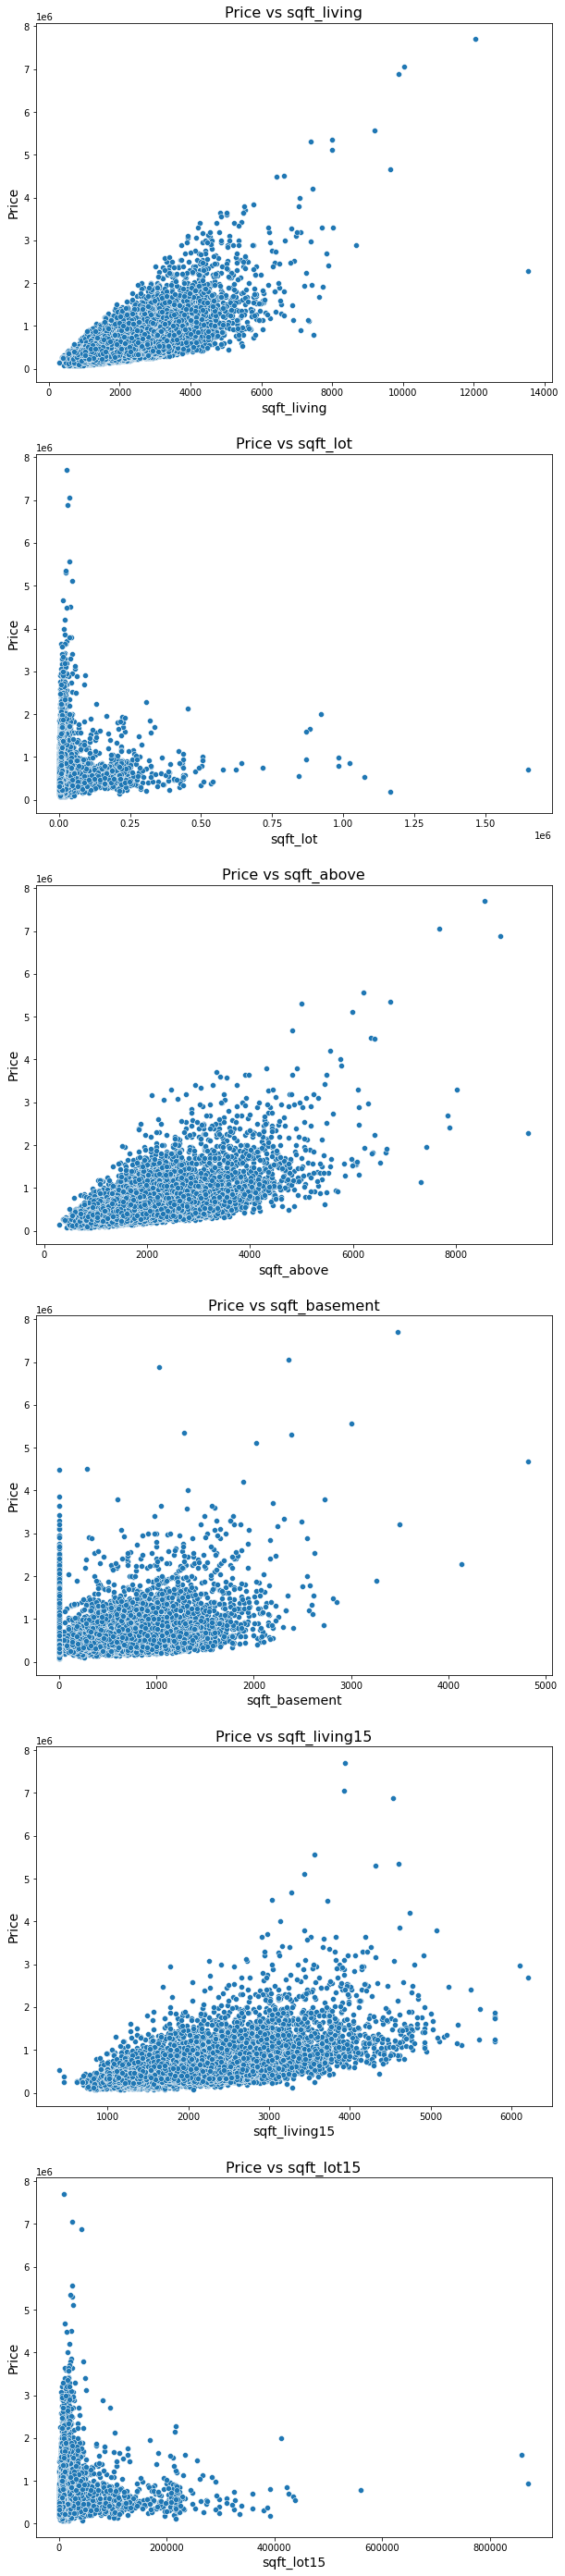

In [ ]:
# plot scatter plots to show relationships between house price and the different variables with continuous numerical data
col_names= ['sqft_living',	'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',	'sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize=(10,50))

for i, col_val in enumerate(col_names):

    sns.scatterplot(y=hass.price, x=hass[col_val], ax=ax[i])
    ax[i].set_title('Price vs {}'.format(col_val), fontsize=16)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].set_ylabel('Price', fontsize=14)

The relationships with between price and the different variables are non-linear.

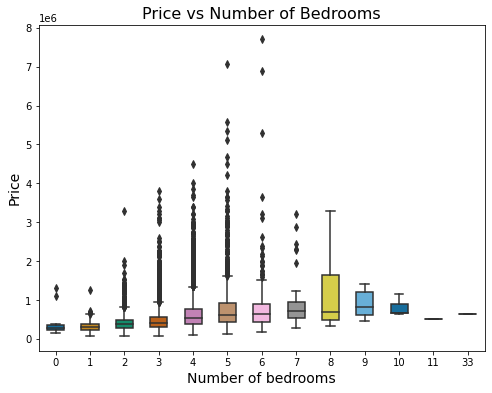

correlation coefficient  0.3083461828688016


In [ ]:
# plot boxplot that shows relationship between price and bedrooms
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=hass.price, x=hass.bedrooms, width=0.5,palette="colorblind")
plt.title('Price vs Number of Bedrooms', fontsize=16)
plt.xlabel('Number of bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

# print correlation coefficient
print('correlation coefficient ', hass["price"].corr(hass["bedrooms"])) 

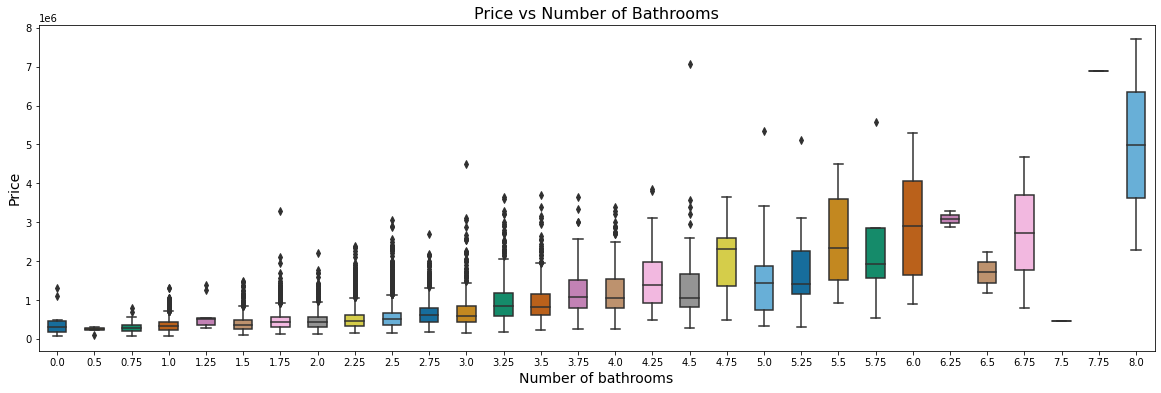

correlation coefficient  0.5251399153586779


In [ ]:
# plot boxplot that shows relationship between price and bathrooms
fig, ax = plt.subplots(figsize=(20, 6))

sns.boxplot(y=hass.price, x=hass.bathrooms, width=0.5,palette="colorblind")
plt.title('Price vs Number of Bathrooms', fontsize=16)
plt.xlabel('Number of bathrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

# print correlation coefficient
print('correlation coefficient ', hass["price"].corr(hass["bathrooms"])) 

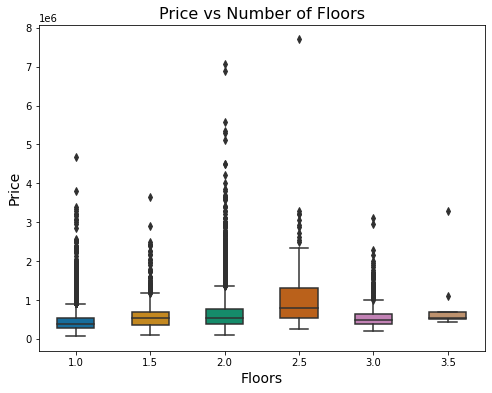

correlation coefficient  0.2567932473152905


In [ ]:
# plot boxplot that shows relationship between price and floors
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=hass.price, x=hass.floors, width=0.5,palette="colorblind")
plt.title('Price vs Number of Floors', fontsize=16)
plt.xlabel('Floors', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()
print('correlation coefficient ', hass["price"].corr(hass["floors"])) 

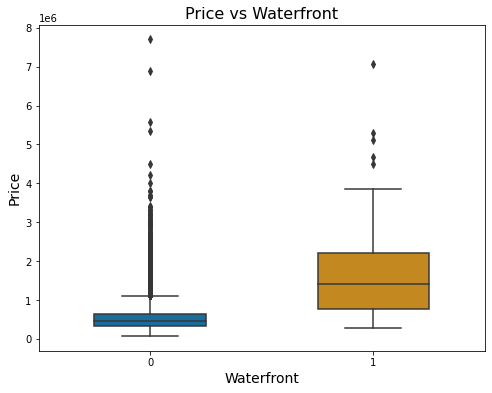

correlation coefficient  0.2663315198159196


In [ ]:
# plot boxplot that shows relationship between price and waterfront
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=hass.price, x=hass.waterfront, width=0.5,palette="colorblind")
plt.title('Price vs Waterfront', fontsize=16)
plt.xlabel('Waterfront', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

# print correlation coefficient
print('correlation coefficient ', hass["price"].corr(hass["waterfront"])) 

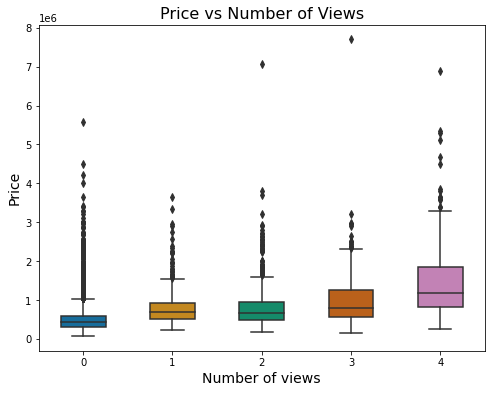

correlation coefficient  0.39746598194021615


In [ ]:
# plot boxplot that shows relationship between price and views
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=hass.price, x=hass.view, width=0.5,palette="colorblind")
plt.title('Price vs Number of Views', fontsize=16)
plt.xlabel('Number of views', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

# print correlation coefficient
print('correlation coefficient ', hass["price"].corr(hass["view"])) 

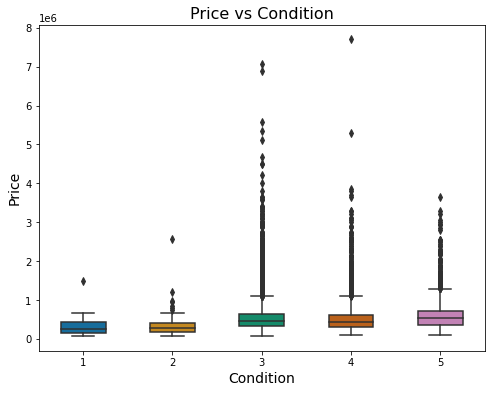

correlation coefficient  0.0363968999538525


In [ ]:
# plot boxplot that shows relationship between price and condition
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(y=hass.price, x=hass.condition, width=0.5,palette="colorblind")
plt.title('Price vs Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

# print correlation coefficient
print('correlation coefficient ', hass["price"].corr(hass["condition"])) 

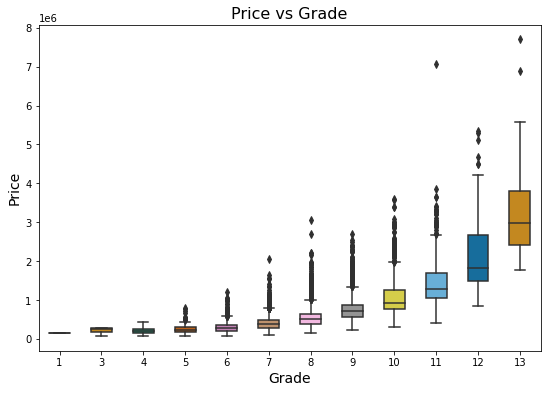

correlation coefficient  0.667478445706622


In [ ]:
# plot boxplot that shows relationship between price and grade
fig, ax = plt.subplots(figsize=(9, 6))

sns.boxplot(y=hass.price, x=hass.grade, width=0.5,palette="colorblind")
plt.title('Price vs Grade', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

# print correlation coefficient
print('correlation coefficient ', hass["price"].corr(hass["grade"])) 

## Multiple linear regression

In order to create a good linear regression model for predictive analysis, the following conditions should be met.

> 1. Linearity: There should be a linear relationship between the independent variable, x, and the dependent variable, y.  
2. Independence: The observasions should be independent of each other
3. Homoscedasticity: The residuals should have a constant variance at every level of x  
4. Normality: The residuals of the model should be normally distributed  
  

From the bivariate analysis above, most of the independent variables do not have a linear relationship with the dependent variable (price); therefore, a trained linear regression model will not be very accurate in predicting the sale price of most of the houses even when the other conditions are met.  
  
We will still create a linear regression model and check whether the other conditions are met to see how the model fairs.

### Multicollinearity check

In [ ]:
# lets put all the independent variables in one subset
independent_variables = hass.drop(['price',], axis=1)

# find the correlations between the variables
correlations = independent_variables.corr()
correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,last_modified
bedrooms,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,-0.15,0.39,0.03,0.17
bathrooms,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,-0.20,0.57,0.09,0.54
sqft_living,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,-0.20,0.76,0.18,0.34
sqft_lot,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,-0.13,0.14,0.72,0.05
floors,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,-0.06,0.28,-0.01,0.51
waterfront,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,0.03,0.09,0.03,-0.00
view,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,0.08,0.28,0.07,-0.02
condition,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,0.00,-0.09,-0.00,-0.40
grade,0.36,0.66,0.76,0.11,0.46,0.08,0.25,-0.14,1.00,0.76,0.17,-0.18,0.71,0.12,0.46
sqft_above,0.48,0.69,0.88,0.18,0.52,0.07,0.17,-0.16,0.76,1.00,-0.05,-0.26,0.73,0.19,0.44


According to the pearson correlation values, there are columns that are strongly correlated. We will use the correlations above to compute variance inflation factors of the variables to check for multicollinearity.

In [ ]:
# create a dataframe that shows the VIF scores of the variables
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,last_modified
bedrooms,1.65,-0.46,-0.63,0.05,0.05,0.06,0.11,-0.05,0.32,-0.31,-0.18,0.08,0.04,0.09,0.12
bathrooms,-0.46,3.35,-3.04,-0.02,-0.68,0.01,-0.04,-0.15,-0.29,1.49,0.39,0.02,0.08,0.08,-0.90
sqft_living,-0.63,-3.04,18145999825646.47,-0.07,2.75,-0.07,-0.03,-0.24,-1.95,-16360805928278.62,-8743992385412.18,-0.52,-1.03,-0.02,0.25
sqft_lot,0.05,-0.02,-0.07,2.09,0.06,0.03,-0.06,0.03,-0.01,-0.17,0.00,0.06,0.14,-1.47,0.05
floors,0.05,-0.68,2.75,0.06,1.99,-0.01,-0.03,0.09,-0.30,-2.93,-0.72,-0.26,0.28,0.09,-0.40
waterfront,0.06,0.01,-0.07,0.03,-0.01,1.20,-0.50,-0.01,0.05,-0.05,0.03,0.01,0.07,-0.02,-0.01
view,0.11,-0.04,-0.03,-0.06,-0.03,-0.50,1.41,-0.03,-0.16,0.05,-0.25,-0.15,-0.29,-0.00,0.12
condition,-0.05,-0.15,-0.24,0.03,0.09,-0.01,-0.03,1.26,-0.04,0.27,0.02,0.18,0.09,-0.03,0.56
grade,0.32,-0.29,-1.95,-0.01,-0.30,0.05,-0.16,-0.04,3.24,0.28,0.42,-0.13,-0.88,0.11,-0.43
sqft_above,-0.31,1.49,-16360805928278.62,-0.17,-2.93,-0.05,0.05,0.27,0.27,14751238465491.83,7883763023843.34,0.55,-0.64,-0.19,0.13


The VIF scores of 'sqft_living', 'sqft_above', and 'sqft_basement', are very high. Let's see how the scores improve when we remove 'sqft_living' from the dataset

In [ ]:
# drop columns 
revised = hass.drop(['price', 'sqft_living'], axis=1)
# compute the pearson correlation values
correlations = revised.corr()
# create a dataframe that shows the VIF scores of the variables
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,last_modified
bedrooms,1.65,-0.46,0.05,0.05,0.06,0.11,-0.05,0.32,-0.88,-0.48,0.08,0.04,0.09,0.12
bathrooms,-0.46,3.35,-0.02,-0.68,0.01,-0.04,-0.15,-0.29,-1.25,-1.07,0.02,0.08,0.08,-0.90
sqft_lot,0.05,-0.02,2.09,0.06,0.03,-0.06,0.03,-0.01,-0.23,-0.03,0.06,0.14,-1.47,0.05
floors,0.05,-0.68,0.06,1.99,-0.01,-0.03,0.09,-0.30,-0.45,0.60,-0.26,0.28,0.09,-0.40
waterfront,0.06,0.01,0.03,-0.01,1.20,-0.50,-0.01,0.05,-0.11,-0.01,0.01,0.07,-0.02,-0.01
view,0.11,-0.04,-0.06,-0.03,-0.50,1.41,-0.03,-0.16,0.02,-0.27,-0.15,-0.29,-0.00,0.12
condition,-0.05,-0.15,0.03,0.09,-0.01,-0.03,1.26,-0.04,0.05,-0.09,0.18,0.09,-0.03,0.56
grade,0.32,-0.29,-0.01,-0.30,0.05,-0.16,-0.04,3.24,-1.48,-0.52,-0.13,-0.88,0.11,-0.43
sqft_above,-0.88,-1.25,-0.23,-0.45,-0.11,0.02,0.05,-1.48,4.82,1.36,0.08,-1.57,-0.21,0.35
sqft_basement,-0.48,-1.07,-0.03,0.60,-0.01,-0.27,-0.09,-0.52,1.36,1.98,-0.18,-0.44,-0.04,0.25


As much as multicollinearity is still present after dropping 'sqft_living', the scores are within the acceptable range of collinearity; therefore, we will use the remaining variables in creating the linear regression model.

### Modelling

In [ ]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = hass.drop(['price', 'sqft_living'], axis=1)
y = hass["price"]

# scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# normalizing the y variable
y = np.log(y)

from sklearn.preprocessing import MinMaxScaler

#scaled_data = MinMaxScaler()
#X = scaler.fit_transform(X)

# Splitting our Data into Training and Test sets

# import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# the script above splits 80% of the data to training set and 20% of the data to test set

In [ ]:
# Training the Algorithm

# import the desired model, in this this case we are importing linear regression model
from sklearn.linear_model import LinearRegression

# instantiate the model
linear = LinearRegression()

# train the algorithm by fitting it to our training data 
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the regressor intercept and coefficients for the predictor variables.
print('Intercept: ',linear.intercept_)
print('Coefficients: ',linear.coef_)

Intercept:  13.04840410439029
Coefficients:  [-0.02070207  0.0531321   0.01205266  0.05675014  0.03447565  0.03111442
  0.03158913  0.23515834  0.09573949  0.08813786  0.02854856  0.07443215
 -0.01433766 -0.12796079]


In [ ]:
# Making Predictions

# obtain the trained model's predictions of the based on X_test 
y_pred = linear.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)

# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(10)

,Actual,Prediction,Error
0,12.78,12.94,0.17
1,12.86,13.06,0.20
2,12.43,12.47,0.04
3,12.90,13.28,0.38
4,13.37,13.08,-0.29
5,13.48,12.97,-0.51
6,12.25,12.95,0.70
7,12.54,13.00,0.45
8,12.70,13.04,0.34
9,12.87,12.96,0.09


In [ ]:
# Evaluating the Algorithm

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
#print('R Squared Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.25204052926898407
Mean Squared Error: 0.09984879921745113
Root Mean Squared Error: 0.3159886061513154


The RMSE score is less than 10% of the mean of all house prices meaning that out model is good at predicting house prices given the predictive variables  
  

### Residuals plot

In [ ]:
#Step 1
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

#Step 2
# statistical description
residual = pd.DataFrame(residuals).describe()

#Step 3
# compute the mean of the residuals 
residuals.mean()

0.002724279013697073

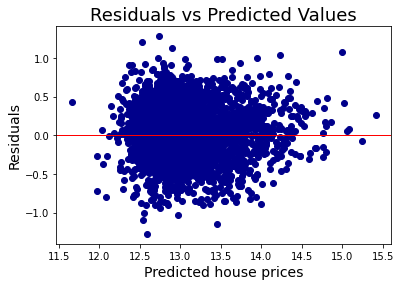

In [ ]:
#Step 4
# create residual scatter plot of residuals vs predicted values
plt.scatter(y_pred, residuals, color = 'darkblue')

plt.title('Residuals vs Predicted Values', fontsize = 18,)
plt.ylabel('Residuals', fontsize = 14)
plt.xlabel('Predicted house prices', fontsize = 14)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 1)
plt.show()

The residual plot show that the residuals have a normal distribution

### Heterosedasticity test

We will perform heteroskedasticity test using bartlett's test. The test tests the null hypothesis that the variance is equal for all our datapoints,and the alternative hypothesis that the variance is different for at least one pair of datapoints.

In [ ]:
import scipy as sp

# compute the test result and p-value of the test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")

The variances are homogeneous!


Barlett's test shows that heteroscedasticity is not an issue in our given data.

### **Limitations of linear regression**
Some of the limitations of linear regression are that predictive variables  must be independent, linear regression is sensitive to outliers, linear regression only looks at the mean of the dependent variable, and linear regression is limited to linear relationships. 


### **Recommendations**  
Use Principal component analysis (also a dimensionality reduction technique) which is a statistical procedure to convert a set of possibly correlated predictors into a set of linearly uncorrelated variables.

## Quantile Regression  
Quantile regression is an extension of linear regression that is used when the conditions of linear regression are not met (i.e., linearity, homoscedasticity, independence, or normality). Additionally, whereas the linear regression estimates the conditional mean of the response variable across values of the predictor variables, quantile regression estimates the conditional median of the response variable.  
In our case of house price prediction, we will use quantile regression to predict the extent to which different house characteristics affect the prices of houses in different quantiles. We will compute the coefficients of the variables from the 10th to 100th percentiles

In [ ]:
hass.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'last_modified'],
      dtype='object')

In [ ]:
# Defining the range of the quantiles
quantiles = np.arange(0.1, 1.0, 0.1)
import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above', data =hass)

for qt in quantiles:
  res = mod.fit(qt)
  print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2371
Model:                       QuantReg   Bandwidth:                   2.468e+04
Method:                 Least Squares   Sparsity:                    4.656e+05
Date:                Mon, 17 May 2021   No. Observations:                21610
Time:                        08:57:17   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.349e+05   9296.876    -36.026      0.000   -3.53e+05   -3.17e+05
bedrooms      -1.5e+04   1210.287    -12.395      0.000   -1.74e+04   -1.26e+04
bathrooms     514.5398   1972.233      0.261      0.794   -3351.182    4380.262
sqft_living    98.6393      2.981     33.094   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2581
Model:                       QuantReg   Bandwidth:                   2.358e+04
Method:                 Least Squares   Sparsity:                    4.201e+05
Date:                Mon, 17 May 2021   No. Observations:                21610
Time:                        08:57:20   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.525e+05   1.13e+04    -40.072      0.000   -4.75e+05    -4.3e+05
bedrooms    -2.265e+04   1441.248    -15.712      0.000   -2.55e+04   -1.98e+04
bathrooms   -8817.0061   2395.904     -3.680      0.000   -1.35e+04   -4120.858
sqft_living   134.0082      3.621     37.013   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2872
Model:                       QuantReg   Bandwidth:                   2.431e+04
Method:                 Least Squares   Sparsity:                    4.010e+05
Date:                Mon, 17 May 2021   No. Observations:                21610
Time:                        08:57:24   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.436e+05   1.28e+04    -42.384      0.000   -5.69e+05   -5.18e+05
bedrooms    -2.506e+04   1613.741    -15.527      0.000   -2.82e+04   -2.19e+04
bathrooms    -1.85e+04   2679.432     -6.905      0.000   -2.38e+04   -1.32e+04
sqft_living   151.6161      3.914     38.733   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3165
Model:                       QuantReg   Bandwidth:                   2.581e+04
Method:                 Least Squares   Sparsity:                    3.910e+05
Date:                Mon, 17 May 2021   No. Observations:                21610
Time:                        08:57:27   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.548e+05   1.39e+04    -39.830      0.000   -5.82e+05   -5.28e+05
bedrooms      -2.8e+04   1729.321    -16.191      0.000   -3.14e+04   -2.46e+04
bathrooms   -2.241e+04   2849.448     -7.866      0.000    -2.8e+04   -1.68e+04
sqft_living   165.3176      4.043     40.886   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3439
Model:                       QuantReg   Bandwidth:                   2.643e+04
Method:                 Least Squares   Sparsity:                    3.824e+05
Date:                Mon, 17 May 2021   No. Observations:                21610
Time:                        08:57:31   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.648e+05   1.44e+04    -39.154      0.000   -5.93e+05   -5.37e+05
bedrooms    -2.755e+04   1788.396    -15.403      0.000   -3.11e+04    -2.4e+04
bathrooms   -2.681e+04   2889.629     -9.279      0.000   -3.25e+04   -2.11e+04
sqft_living   180.1317      3.995     45.089   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3703
Model:                       QuantReg   Bandwidth:                   2.590e+04
Method:                 Least Squares   Sparsity:                    3.880e+05
Date:                Mon, 17 May 2021   No. Observations:                21610
Time:                        08:57:34   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.763e+05   1.49e+04    -38.559      0.000   -6.06e+05   -5.47e+05
bedrooms    -2.543e+04   1858.732    -13.679      0.000   -2.91e+04   -2.18e+04
bathrooms   -2.924e+04   2925.538     -9.994      0.000    -3.5e+04   -2.35e+04
sqft_living   194.3478      3.977     48.862   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3934
Model:                       QuantReg   Bandwidth:                   2.450e+04
Method:                 Least Squares   Sparsity:                    4.608e+05
Date:                Mon, 17 May 2021   No. Observations:                21610
Time:                        08:57:38   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -5.95e+05   1.75e+04    -33.917      0.000   -6.29e+05   -5.61e+05
bedrooms    -2.542e+04   2200.238    -11.555      0.000   -2.97e+04   -2.11e+04
bathrooms   -3.493e+04   3350.624    -10.424      0.000   -4.15e+04   -2.84e+04
sqft_living   216.4655      4.483     48.289   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4214
Model:                       QuantReg   Bandwidth:                   2.385e+04
Method:                 Least Squares   Sparsity:                    6.502e+05
Date:                Mon, 17 May 2021   No. Observations:                21610
Time:                        08:57:41   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.526e+05    2.3e+04    -24.020      0.000   -5.98e+05   -5.07e+05
bedrooms    -3.064e+04   2937.424    -10.430      0.000   -3.64e+04   -2.49e+04
bathrooms   -4.257e+04   4259.318     -9.994      0.000   -5.09e+04   -3.42e+04
sqft_living   255.5705      5.622     45.463   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


The coefficient results show how the house prices are affected by unit changes of the different factors in each quantile.  

## Ridge regression  
In addition to being able to tackle multicollinearity, ridge regression  allows us to regularize coefficient estimates made by linear regression. This means that the estimated coefficients are pushed towards 0, to make them work better on new data-sets ("optimized for prediction"), hence, allows us to use complex models and avoid over-fitting at the same time.

In [ ]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = hass.drop(['price'], axis=1).values
y = hass["price"].values

# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Normalizing the y variable
y = np.log(y)


# Splitting our Data into Training and Test sets

# import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# the script above splits 80% of the data to training set and 20% of the data to test set

In [ ]:
# Determine the most appropriate hyperparameter value for the l2 regularization using grid search. 

# Import ridge regressor 
from sklearn.linear_model import Ridge

# Instantiate ridge model and indicate normalization in order to get better estimates
ridge = Ridge(normalize=True)

# Setup the grid that we will use. 
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Use the .fit function to run the model and then use the .best_params_ and .best_scores_ function to determine the models strength. 
search.fit(X_train,y_train)
print(search.best_params_)
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha to
# The best_score_ tells us what the best possible mean squared error is

{'alpha': 0.001}


0.10023989467847097

In [ ]:
# Fitting our model with the recommended alpha value
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
# Finding the coefficients of the variables
print('Coefficients: ',ridge.coef_)

Coefficients:  [-0.02065013  0.05305137  0.06291089  0.01200999  0.05666156  0.03443846
  0.0311888   0.03162427  0.23454062  0.03933305  0.05787214  0.02860154
  0.07449037 -0.01431305 -0.12758813]


In [ ]:
# Making Predictions

# obtain the trained model's predictions of the based on X_test 
y_pred = ridge.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)
# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(10)

,Actual,Prediction,Error
0,12.78,12.94,0.17
1,12.86,13.06,0.20
2,12.43,12.47,0.04
3,12.90,13.28,0.38
4,13.37,13.08,-0.29
5,13.48,12.97,-0.51
6,12.25,12.95,0.70
7,12.54,13.00,0.45
8,12.70,13.04,0.34
9,12.87,12.96,0.09


In [ ]:
# Evaluating the Algorithm

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.2520615443206125
Mean Squared Error: 0.09984884666464053
Root Mean Squared Error: 0.3159886812286803


Although the RMSE is reasonably low, it is slightly greater than linear regression's RMSE; meaning that linear regression model is better at predicting the house prices than the ridge regression model.

**Limitations of ridge regression**  
Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero. Hence, this model is not good for feature reduction if feature reduction is necessary. 

## Lasso regression
Whereas Ridge regression (l2 regularization) only does parameter shrinkage and end up including all the coefficients in the model, lasso regression (l1 regularization) does both variable selection and parameter shrinkage.

In [ ]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = hass.drop(['price'], axis=1).values
y = hass["price"].values

# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Normalizing the y variable
y = np.log(y)


# Splitting our Data into Training and Test sets

# import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# the script above splits 80% of the data to training set and 20% of the data to test set

In [ ]:
# Determine the most appropriate value for the l1 regularization using grid search. 

# Import lasso regressor 
from sklearn.linear_model import Lasso

# Instantiate lasso model and indicate normalization in order to get better estimates
lasso = Lasso(normalize=True)

# Set up the grid to be used
search_lasso = GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Use the .fit function to run the model and then use the .best_params_ and .best_scores_ function to determine the best alpha value and the models strength.  
search_lasso.fit(X_train,y_train)
print(search_lasso.best_params_)
abs(search_lasso.best_score_) 

# The best_params_ tells us what to set alpha to 
# The best_score_ tells us what the best possible mean squared error is

{'alpha': 1e-05}


0.1002680938153659

In [ ]:
# Fit the model using the given optimal alpha value
lasso = Lasso(normalize=True,alpha=0.00001)
lasso.fit(X_train,y_train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Find the coefficients of the predictor variables
print('Coefficients: ',lasso.coef_)

Coefficients:  [-0.0172711   0.05086989  0.10627408  0.00742486  0.05441343  0.03344965
  0.03151471  0.03040641  0.23502841  0.          0.03555434  0.02774932
  0.0725709  -0.00965377 -0.12512685]


In [ ]:
# Making Predictions

# obtain the trained model's predictions of the based on X_test 
y_pred = lasso.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)
# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(10)

,Actual,Prediction,Error
0,12.78,12.95,0.17
1,12.86,13.06,0.20
2,12.43,12.47,0.04
3,12.90,13.29,0.38
4,13.37,13.08,-0.29
5,13.48,12.97,-0.51
6,12.25,12.96,0.70
7,12.54,13.00,0.45
8,12.70,13.04,0.34
9,12.87,12.96,0.09


In [ ]:
# Evaluating the Algorithm

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.25219381748267156
Mean Squared Error: 0.09983067041060452
Root Mean Squared Error: 0.3159599189938567


Lasso's RMSE is slightly lower than both ridge's an linear's RMSEs.

**Limitations of lasso regression**  
* If the number of predictors is greater than the number of observations, lasso will pick a few predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
* If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

## Elastic net regression
Since the elastic net regression uses both l1 and l2 regularizations, it combines the power of ridge and lasso regression into one algorithm. What this means is that with elastic net the algorithm can remove weak variables altogether as with lasso or to reduce them to close to zero as with ridge and in most cases, it performs better than lasso and ridge regression models.

In [ ]:
# Determine the optimal values for the hyperparameters using grid search 

# Import elastic net regressor
from sklearn.linear_model import ElasticNet

# Instantiate elastic net model and indicate normalization in order to get better estimates
elastic=ElasticNet(normalize=True)

# Set up the grid to be used
search_elastic=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Use the .fit function to run the model and then use the .best_params_ and .best_scores_ function to determine the best alpha value and the models strength.  
search_elastic.fit(X_train,y_train)
print(search_elastic.best_params_)
abs(search_elastic.best_score_) 

# The best_params_ tells us what to set alpha and l1_ratio to
# The best_score_ tells us what the best possible mean squared error is

{'alpha': 1e-05, 'l1_ratio': 0.8}


0.10043506521486416

In [ ]:
# Fit the model using the given optimal alpha value
elastic = ElasticNet(normalize=True, alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)

ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Print the coefficients of the predictor variables
print('Coefficients: ',elastic.coef_)

Coefficients:  [-0.01605789  0.04942855  0.07218535  0.00750197  0.05232326  0.03256064
  0.03362653  0.03154846  0.21642684  0.03866545  0.0533431   0.02928849
  0.07498835 -0.01008004 -0.11434172]


In [ ]:
# Making Predictions

# obtain the trained model's predictions of the based on X_test 
y_pred = elastic.predict(X_test) # the y_pred is a numpy array that contains all the predicted values
error= (y_pred-y_test)
# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred, 'Error':error})

# display top 10 records in the comparison dataframe
df.head(10)

,Actual,Prediction,Error
0,12.78,12.95,0.18
1,12.86,13.07,0.21
2,12.43,12.49,0.06
3,12.90,13.29,0.38
4,13.37,13.07,-0.30
5,13.48,12.98,-0.50
6,12.25,12.97,0.71
7,12.54,12.99,0.45
8,12.70,13.04,0.33
9,12.87,12.97,0.09


In [ ]:
# Evaluating the Algorithm

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.2530661329986125
Mean Squared Error: 0.10002910631468696
Root Mean Squared Error: 0.3162737837929141


Elastic net's RMSE is slightly higher than linear's and ridge's and lasso's

**Limitations of elastic net regression**  
A limitation of Elastic net regression is that it can suffer from double shrinkage, which leads to increased bias and poor predictions.